In this notebook, you will find graphs representing results from simulations previously run, so you can compare your results with these

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from leap.simulation import Simulation
from leap.logger import get_logger

In [3]:
# setup the logger
logger = get_logger(__name__)

In [5]:
# set output path to output/jupter folder in root
output_path = pathlib.Path("/home/me/pharmsci/leap/output/jupyter_revised")
simulation = Simulation(min_year=2001, province="CA", population_growth_type="M3", ignore_pollution_flag=True)
repr(simulation)

"Simulation(max_age=111, province='CA', min_year=2001, time_horizon=19, num_births_initial=100, population_growth_type='M3')"

In [6]:
# check if path exists before running
if not output_path.exists():
    raise Exception(f"Please input a correct output path.\nPath was <{output_path}>")

logger.message("Running simulation...")
outcome_matrix = simulation.run()
logger.message(outcome_matrix)
outcome_matrix.save(path=output_path)

[MESSAGE]: Running simulation...


Agent 9f4435: 100%|██████████| 9443/9443
Agent db76d9: 100%|██████████| 171/171
Agent a7cba9: 100%|██████████| 156/156
Agent b2e086: 100%|██████████| 161/161
Agent 5075fa: 100%|██████████| 165/165
Agent d9d3d6: 100%|██████████| 172/172
Agent b8c715: 100%|██████████| 171/171
Agent f8f7fa: 100%|██████████| 184/184
Agent 09b3f9: 100%|██████████| 192/192
Agent 1d5595: 100%|██████████| 192/192
Agent aaf66c: 100%|██████████| 183/183
Agent 2e32f4: 100%|██████████| 194/194
Agent 58cd85: 100%|██████████| 192/192
Agent cb6b75: 100%|██████████| 191/191
Agent 10e4a3: 100%|██████████| 169/169
Agent 2dd920: 100%|██████████| 211/211
Agent 7c670b: 100%|██████████| 218/218
Agent 13293a: 100%|██████████| 246/246
Agent b5989d: 100%|██████████| 253/253
Year 2019: 100%|██████████| 19/19


[MESSAGE]: OutcomeMatrix

until_all_die:
False

min_year:
2001

max_year:
2019

max_age:
111

_alive:
      year  age sex  n_alive
0     2001    0   F       47
1     2001    0   M       53
2     2001    1   F       58
3     2001    1   M       47
4     2001    2   F       57
...    ...  ...  ..      ...
4251  2019  109   M        0
4252  2019  110   F        0
4253  2019  110   M        0
4254  2019  111   F        0
4255  2019  111   M        0

[4256 rows x 4 columns]

_antibiotic_exposure:
      year  age sex  n_antibiotic_exposure
0     2001    0   F                     41
1     2001    0   M                     60
2     2001    1   F                     42
3     2001    1   M                     51
4     2001    2   F                     38
...    ...  ...  ..                    ...
4251  2019  109   M                      0
4252  2019  110   F                      0
4253  2019  110   M                      0
4254  2019  111   F                      0
4255  2019  111   M          

### Figure 5. Population by age across selected years from the model (grey solid) and from Statistics Canada (black dashed).

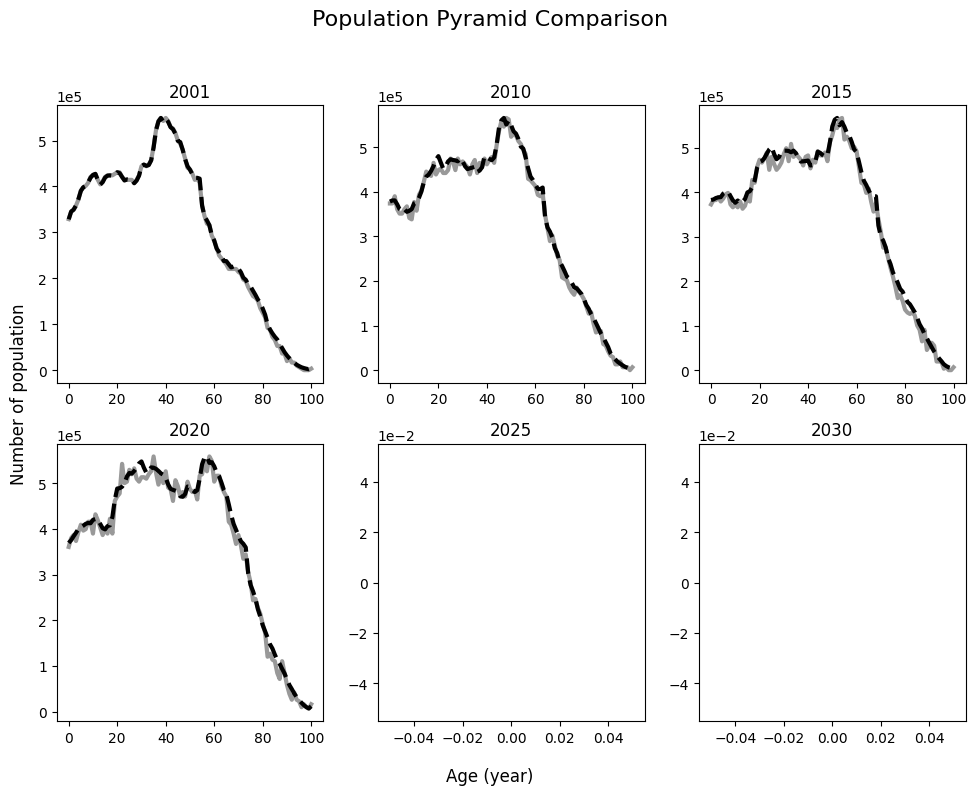

In [32]:
# Simulation parametres
chosen_province = "CA"
baseline_year = 2001
growth_type = "M3"

# Figure Parameters
num_cols = 3
num_rows = 2
figure_years = [2001, 2010, 2015, 2020, 2025, 2030]

# Read in population data from StatsCanada
canada_pop_df = pd.read_csv("leap/processed_data/initial_pop_distribution.csv")
canada_pop_df = canada_pop_df.query("province == @chosen_province and year >= @baseline_year")

# Read in population data from simulation
simulation_df = pd.read_csv("output/BIG_CA_30/outcome_matrix_alive.csv")
simulation_df = simulation_df.query("year >= @baseline_year")

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))

for i, year in enumerate(figure_years):
    ax : plt.Axes = axs[i // num_cols][i % num_cols]
    
    # Filter stats data by current year
    stats_year_data = canada_pop_df.query("year == @year")
    stats_year_totals = stats_year_data.groupby("age").sum().reset_index()
    
    # Filter simulation data by current year
    simulation_year_data = simulation_df.query("year == @year and age <= 100")
    simulation_year_toals = simulation_year_data.groupby("age").sum().reset_index()
    # Scale the simulation data to match the maximum population of the stats data
    scaling_factor = stats_year_totals["n"].max() / simulation_year_toals["n_alive"].max()
    simulation_year_toals["n_alive"] *= scaling_factor
    
    ax.plot(simulation_year_toals["age"], simulation_year_toals["n_alive"], label="True",
            color="#999999", linestyle="-", linewidth=3)
    ax.plot(stats_year_totals["age"], stats_year_totals["n"], label="True",
            color="black", linestyle="dashed", linewidth=3)


    # Title and Labels
    ax.set_title(f"{year}", fontsize=12)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

fig.supxlabel("Age (year)")
fig.supylabel("Number of population")
fig.suptitle("Population Pyramid Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

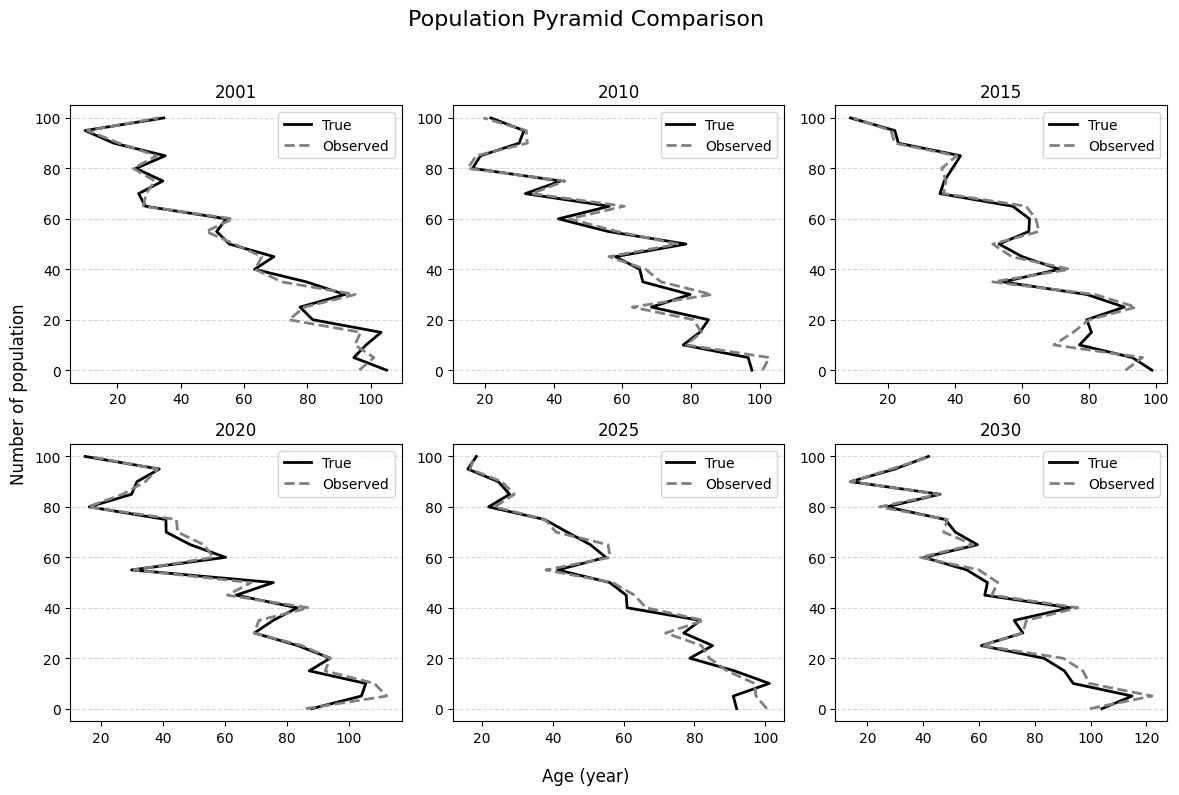

In [59]:
# Figure 5. Population by age across selected years from the model (grey solid) and from Statistics Canada (black dashed).

# Simulation Parameters

# Figure Parameters
num_cols = 3
num_rows = 2

np.random.seed(42)
figure_years = [2001, 2010, 2015, 2020, 2025, 2030]
ages = np.arange(0, 101, 5)

# Simulate "True" and "Observed" populations
true_population = {
    year: np.maximum(0, np.random.normal(100 - (ages * 0.8), 10)) for year in figure_years
}
observed_population = {
    year: np.maximum(0, true_population[year] * np.random.uniform(0.9, 1.1, len(ages))) for year in figure_years
}

# Make fake dataframe
infant_sex_data = []
for year in figure_years:
    for age, true_val, observed_val in zip(ages, true_population[year], observed_population[year]):
        infant_sex_data.append(
            {"Year": year, "Age": age, "True": true_val, "Observed": observed_val})

df = pd.DataFrame(infant_sex_data)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for i, year in enumerate(figure_years):
    ax = axs[i // num_cols][i % num_cols]
    stats_year_data = df.query("Year == @year")

    ax.plot(stats_year_data["True"], stats_year_data["Age"], label="True",
            color="black", linestyle="solid", linewidth=2)
    ax.plot(stats_year_data["Observed"], stats_year_data["Age"], label="Observed",
            color="grey", linestyle="dashed", linewidth=2)

    # Title and Labels
    ax.set_title(f"{year}", fontsize=12)
    ax.grid(axis='y', linestyle="--", alpha=0.5)
    ax.legend(loc="upper right")

fig.supxlabel("Age (year)")
fig.supylabel("Number of population")
fig.suptitle("Population Pyramid Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Figure 6. Rate of antibiotic prescriptions by sex (red: females; blue: males) for simulated (solid) and target values (dotted), with the floor rate of 50 per 1,000 (purple).

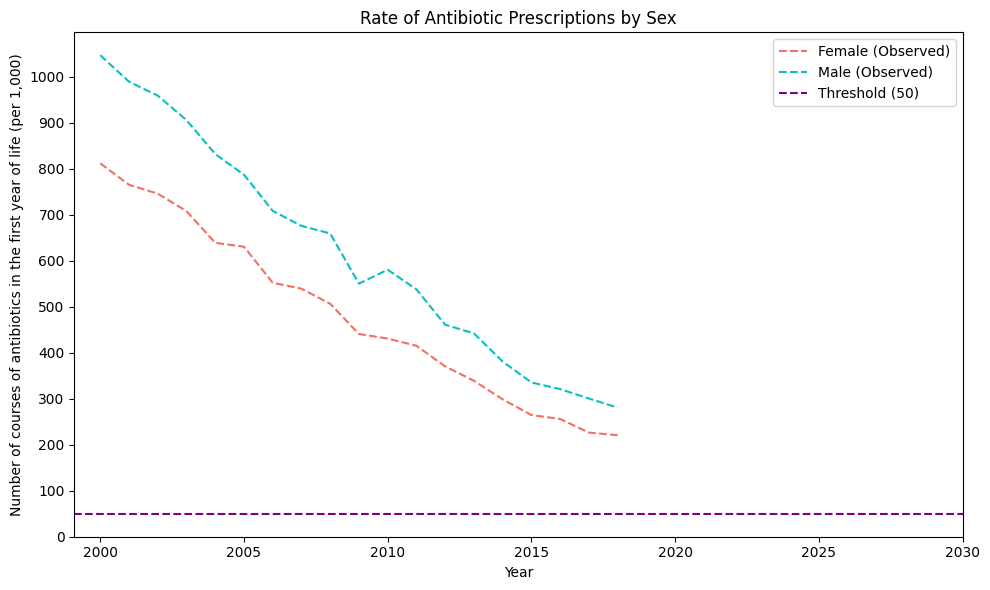

In [37]:
## Figure 6. Rate of antibiotic prescriptions by sex (red: females; blue: males) for simulated (solid) and target values (dotted), with the floor rate of 50 per 1,000 (purple).

# Load target data
infant_data = pd.read_csv("leap/processed_data/InfantAbxBC.csv")

# Plotting
plt.figure(figsize=(10, 6))

# Define colors to plot for different sexs
sex_colour_dict = {"Male": "#09bfc4", "Female": "#f86d63"}

# Dotted lines from count_data
for sex in infant_data['sex'].unique():
    infant_sex_data = infant_data[infant_data['sex'] == sex]
    plt.plot(
        infant_sex_data['year'],
        infant_sex_data['rate'],
        c=sex_colour_dict[sex],
        linestyle='dashed',
        label=f"{sex} (Observed)"
    )

# Additional elements
plt.axhline(y=50, color='purple', linestyle='dashed', label="Threshold (50)")
plt.ylabel("Number of courses of antibiotics in the first year of life (per 1,000)")
plt.xlabel("Year")
plt.xticks(range(infant_data['year'].min(), infant_data['year'].max() + 16, 5))
plt.yticks(range(0, 1100, 100))
plt.legend(title="")
plt.title("Rate of Antibiotic Prescriptions by Sex")

# Save the figure
plt.tight_layout()
plt.show()